# Sentiment Analysis on Twitter Dataset

## Introduction
The social media platforms and online forums has led to the generation of vast amounts of user-generated content every day. Sentiment analysis, which involves determining the sentiment or emotion conveyed in a piece of text, has become a crucial tool for businesses, researchers, and organizations. In this project, we aim to build a sentiment analysis model using the Sentiment140 dataset, a popular open-source dataset consisting of tweets, to classify them into sentiment categories like positive, negative, or neutral.

## Objective
The main goal of this project is to design and implement a sentiment analysis pipeline using natural language processing (NLP) techniques and open-source tools. The objectives include:
1. Preprocessing raw text data to extract relevant features.
2. Developing and training machine learning models for sentiment classification.
3. Comparing the performance of different algorithms and techniques.
4. Providing insights into the challenges and potential applications of sentiment analysis.

## Dataset
For this project, we will use the **Sentiment140** dataset, which contains 1.6 million tweets labeled as positive, negative, or neutral. This dataset is chosen for its size, diversity, and accessibility, making it ideal for sentiment analysis. The dataset will undergo preprocessing to remove noise and prepare it for analysis.

### Other Potential Datasets:
- **IMDb Reviews**: A collection of movie reviews labeled by sentiment.
- **Amazon Product Reviews**: Product reviews with corresponding ratings and sentiment labels.

## Methodology

### 1. Data Preprocessing
Data preprocessing is crucial for preparing raw text data for machine learning models. The preprocessing steps include:
- **Tokenization**: Breaking down the text into individual words or tokens.
- **Stemming/Lemmatization**: Reducing words to their base or root form.
- **Removing stop words, punctuation, and non-alphanumeric characters**: Cleaning up the text for analysis.
- **Handling imbalanced data**: Using techniques such as oversampling or undersampling to address class imbalances.

### 2. Feature Engineering
Once the data is preprocessed, we will convert the text into numerical representations using:
- **TF-IDF (Term Frequency-Inverse Document Frequency)**: To capture the importance of words in the dataset.
- **Word2Vec**: A model that generates vector representations of words.
- **Pre-trained embeddings**: Using models like GloVe or BERT to improve word representations.

### 3. Model Development
We will implement various machine learning models for sentiment classification, including traditional models (e.g., Logistic Regression, Support Vector Machines) and more advanced deep learning models (e.g., LSTM, BERT).

### 4. Model Evaluation
To assess the performance of our models, we will use the following metrics:
- **Accuracy**: The proportion of correctly classified instances.
- **Precision, Recall, and F1-Score**: Metrics that provide deeper insight into model performance, especially for imbalanced datasets.
- **ROC-AUC**: To evaluate the trade-off between true positive rate and false positive rate.
- **Cross-validation**: To ensure the model generalizes well across different data subsets.
- **Hyperparameter Tuning**: To optimize the model for better performance.

### 5. Visualization
We will visualize the results of our sentiment analysis with:
- **Confusion Matrices**: To visualize the true positives, false positives, true negatives, and false negatives.
- **Sentiment Distribution Graphs**: To show the distribution of sentiments across the dataset.
- **Feature Importance Plots**: To understand which features are most influential in sentiment classification.

## Expected Outcomes
Upon completion of this project, we expect to achieve:
1. A fully functional sentiment analysis pipeline capable of classifying textual data accurately.
2. A comparative analysis of traditional machine learning models versus modern deep learning approaches.
3. Insights into the effectiveness of different feature extraction techniques and word embeddings.
4. Recommendations for improving sentiment analysis in practical applications.

## Applications
The results of this project could have several real-world applications:
- **Business**: Analyzing customer feedback to gain insights into customer satisfaction and product improvements.
- **Social Media Monitoring**: Tracking public opinion trends across platforms like Twitter.
- **Recommendation Systems**: Enhancing product or movie recommendations based on user sentiment.

## Tools and Technologies
The following tools and technologies will be used in this project:
- **Programming Language**: Python
- **Libraries and Frameworks**: scikit-learn, TensorFlow, PyTorch, NLTK, spaCy
- **Data Visualization**: Matplotlib, Seaborn

## Conclusion
This project will contribute to the field of Natural Language Processing (NLP) by providing an in-depth analysis of sentiment classification techniques using an open-source dataset. The insights gained will further the understanding of sentiment analysis pipelines and inspire future research in this domain.

## References
- Available Open-Source Datasets: Sentiment140, IMDb Reviews, Amazon Reviews.


In [1]:
#load the required imports
# --------------------- Imports and Setup ---------------------
import os
os.environ['TF_ENABLE-ONEDNN-OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow warnings

import time
import re
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK for text preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Scikit-learn libraries for model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, precision_recall_curve, auc)

# TensorFlow and Keras for deep learning models
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten,
                                     Dense, Dropout, Input, Concatenate)

# Keras Tuner for hyperparameter tuning of deep learning models
import keras_tuner as kt

# scikeras wrapper for Keras models for cross-validation
from scikeras.wrappers import KerasClassifier

# Additional utilities
from transformers import BertTokenizer, TFBertForSequenceClassification  # if needed later
from wordcloud import WordCloud
from collections import Counter
import emoji


In [2]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/subash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/subash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Enhancment based on Literature 
Based on the methods and findings in the two papers [^1] [^2], here are ways the twitter sentiment analysis can be improved

### 1. Enhanced Preprocessing and Normalization
- **Twitter-Specific Cleaning:**  
  Both papers emphasize that Twitter data is noisy. Incorporate robust preprocessing that:
  - Removes URLs, user mentions, and retweet markers.
  - Normalizes text by lowercasing, handling all-caps, and reducing elongated characters (e.g., “sooooo” → “so”)[^2].
  
- **Tokenization and Negation Handling:**  
  Implement advanced tokenization that keeps contractions intact (e.g., “don’t” remains a single token) and attaches negation words to the following token, as shown to improve performance in sentiment analysis tasks[^1].

### 2. Feature Extraction Improvements
- **N-gram Selection:**  
  - Experiment with unigrams, bigrams, and trigrams. Pak and Paroubek (2010) observed that bigrams provided a good balance between coverage and capturing sentiment patterns[^1].  
  - Add an option to filter out common n-grams using metrics like entropy or salience. This can help discard features that do not strongly indicate sentiment.
  
- **Part-of-Speech (POS) Features:**  
  - The first paper uses POS tag distributions to enhance sentiment classification. Although Kouloumpis et al. (2011) found mixed results with POS features (possibly due to tagging inaccuracies on informal text), you could experiment with POS tagging and compare its impact on classification performance [^1] [^2].

- **Lexicon-Based Features:**  
  - Integrate sentiment lexicon features (such as from the MPQA lexicon) to capture prior polarity of words, which was shown to improve results when combined with n-gram and microblogging features in the second paper[^2].

- **Microblogging-Specific Features:**  
  - Add binary features for the presence of emoticons, hashtags, and abbreviations (e.g., “OMG”, “BRB”), since these are distinctive in Twitter language and have been found very useful for sentiment detection[^2].

### Summary

By incorporating these improvements—robust preprocessing tailored for Twitter data, advanced feature extraction (including experiments with n-grams, POS tags, and lexicon-based as well as microblogging-specific features), and a thorough evaluation framework—the notebook will better align with the methodologies presented in both Pak and Paroubek (2010) and Kouloumpis et al. (2011). These adjustments should lead to enhanced sentiment classification performance and a more comprehensive analysis pipeline.


[^1]: [Twitter as a Corpus for Sentiment Analysis and Opinion Mining](https://aclanthology.org/L10-1263/) (Pak & Paroubek, LREC 2010)

[^2]: [Sentiment Analysis : The Good the Bad and the OMG ! Efthymios.](https://doi.org/10.1609/icwsm.v5i1.14185) (Wilson, Theresa and Johanna D. Moore, AAAI 2021)

### Step 1: Check and Download Dataset
The dataset is checked locally; if not found, it is downloaded from Stanford's official source.

In [3]:
dataset_path = "../training.1600000.processed.noemoticon.csv"
if not os.path.exists(dataset_path):
    print("Dataset not found.")
    print("Download the dataset from kaggle.")

### About this file

This is the sentiment140 dataset.
It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

* target: the polarity of the tweet (0 = negative,  4 = positive)
* ids: The id of the tweet ( 2087)
* date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
* flag: The query (lyx). If there is no query, then this value is NO_QUERY.
* user: the user that tweeted (robotickilldozr)
* text: the text of the tweet (Lyx is cool)



#
The Sentiment140 dataset (training.1600000.processed.noemoticon.csv) should be in your data directory.

We load the dataset, keep the 'target' and 'text' columns, and map the target values: 0 → 'negative' and 4 → 'positive'.

For local testing, we sample 1% of the data.


In [4]:

# The dataset is loaded and unnecessary columns are dropped.

# set num of rows 
# using lower when running locally
# nrows=50000
# ,nrows=nrows
columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv("../training.1600000.processed.noemoticon.csv", encoding='latin-1', names=columns )
df = df[['target', 'text']]
df['target'] = df['target'].map({0: 'negative', 4: 'positive'})

# getting only 1% to run locally
df = df.sample(frac=0.01)


## Step 2: Exploratory Data Analysis (EDA)

We perform basic EDA by:
- Printing dataset information and class distribution.
- Showing a preview of the dataset.
- Visualizing class distribution, text length, and common words via a wordcloud.


In [5]:

# We analyze the dataset by checking class distribution, text length, and most common words.
print("Dataset Info:\n", df.info())
print("Class Distribution:\n", df['target'].value_counts())


<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 480251 to 756482
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  16000 non-null  object
 1   text    16000 non-null  object
dtypes: object(2)
memory usage: 375.0+ KB
Dataset Info:
 None
Class Distribution:
 target
negative    8112
positive    7888
Name: count, dtype: int64


In [6]:
# Display first few rows of the dataset
print("Dataset Overview:\n")
df.head()

Dataset Overview:



,target,text
480251,negative,Had a good weekend with the family...I hate Mo...
607512,negative,@kwmurphy I saw it first
23476,negative,Alarm clock woke me up on Sunday. I don't work...
479249,negative,@laurenmichaels i failed on brit brit tix
1586999,positive,@askaaronlee yeah it's a tweetypie but in Fran...


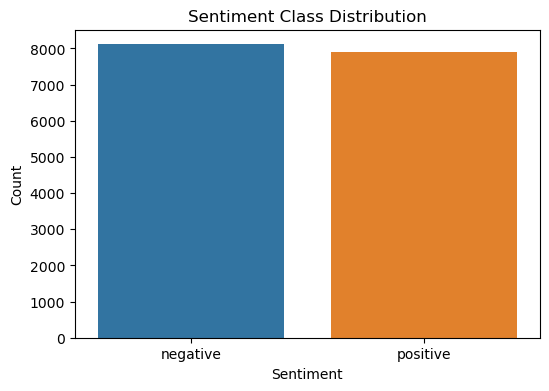

In [7]:
# Visualizing Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['target'], hue=df['target'], legend=False)
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

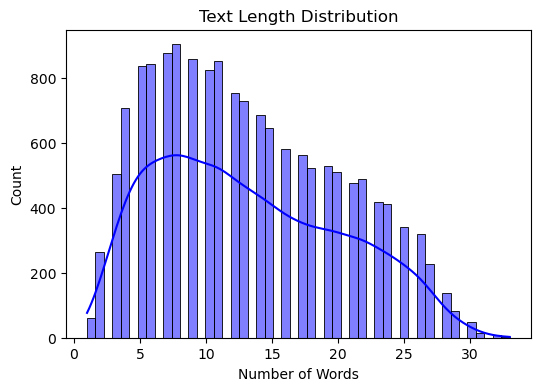

In [8]:
# Text Length Analysis
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6,4))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue')
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

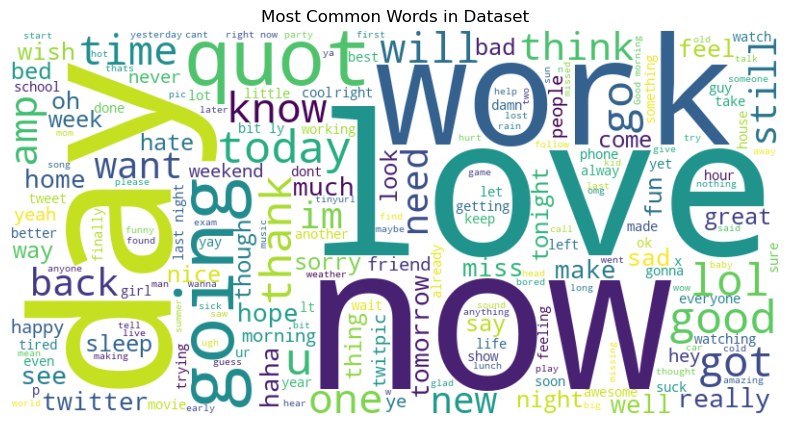

In [9]:
# Common Words Visualization

all_words = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Dataset')
plt.show()


### Step 3: Text Preprocessing

#
We define enhanced preprocessing functions:

1. **clean_tweet:** Removes URLs, user mentions, retweet markers, hashtag symbols; converts text to lowercase; reduces character elongation.
2. **preprocess_text:** Calls clean_tweet, then removes non-alphabetic characters, stopwords, and applies lemmatization.


In [10]:

def clean_tweet(text):
    # Remove URLs, user mentions, RT markers, and hashtag symbols.
    # Convert emojis to text (e.g., 😊 -> :smiling_face_with_smiling_eyes:)
    text = emoji.demojize(text, language='en')
    # Remove URLs.
    text = re.sub(r'http\S+', '', text)
    # Remove user mentions.
    text = re.sub(r'@\w+', '', text)
    # Remove retweet markers.
    text = re.sub(r'\bRT\b', '', text)
    # Remove hashtag symbols (keep the actual word).
    text = re.sub(r'#', '', text)
    # Convert to lowercase
    text = text.lower()  
    # Reduce elongated characters (e.g., "sooooo" -> "so")
    text = re.sub(r'(.)\1{2,}', r'\1', text)  
    return text

def preprocess_text(text):
    # First, clean the tweet using the above function.
    text = clean_tweet(text)
      
    # Remove non-alphabetic characters (punctuation, numbers, etc.)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    # Remove stopwords from tokens.
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize tokens to their base forms.
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the dataset and store in a new column.
df['clean_text'] = df['text'].apply(preprocess_text)



### Step 4: Split Dataset
Split the preprocessed dataset into training and test sets.

For traditional models we will use the clean text and for deep learning we will create sequences later.


In [11]:

# The dataset is split into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['target'], test_size=0.2, random_state=42)



## Step 5: Feature Extraction for Traditional Models

We create a baseline representation using TF-IDF.

This will be used for training the baseline models.


In [12]:

# Convert text into numerical representations using TF-IDF.
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


## Step 6: Training and Evaluating Traditional Machine Learning Models

We train four traditional models:
 - Logistic Regression
 - Random Forest
 - SVM
 - Naive Bayes

Their performance is evaluated on the test set using classification reports and accuracy.


In [13]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': MultinomialNB()
}
classification_reports = {}

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    end_time = time.time()
    print(f"{name} Performance:")
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = report
    print(classification_report(y_test, y_pred))
    print(f"Training time for {name}: {end_time - start_time:.2f} seconds")
    print("-"*50)

Training Logistic Regression...
Logistic Regression Performance:
              precision    recall  f1-score   support

    negative       0.74      0.73      0.74      1585
    positive       0.74      0.75      0.74      1615

    accuracy                           0.74      3200
   macro avg       0.74      0.74      0.74      3200
weighted avg       0.74      0.74      0.74      3200

Training time for Logistic Regression: 0.05 seconds
--------------------------------------------------
Training Random Forest...
Random Forest Performance:
              precision    recall  f1-score   support

    negative       0.73      0.73      0.73      1585
    positive       0.73      0.73      0.73      1615

    accuracy                           0.73      3200
   macro avg       0.73      0.73      0.73      3200
weighted avg       0.73      0.73      0.73      3200

Training time for Random Forest: 11.75 seconds
--------------------------------------------------
Training SVM...
SVM Perform

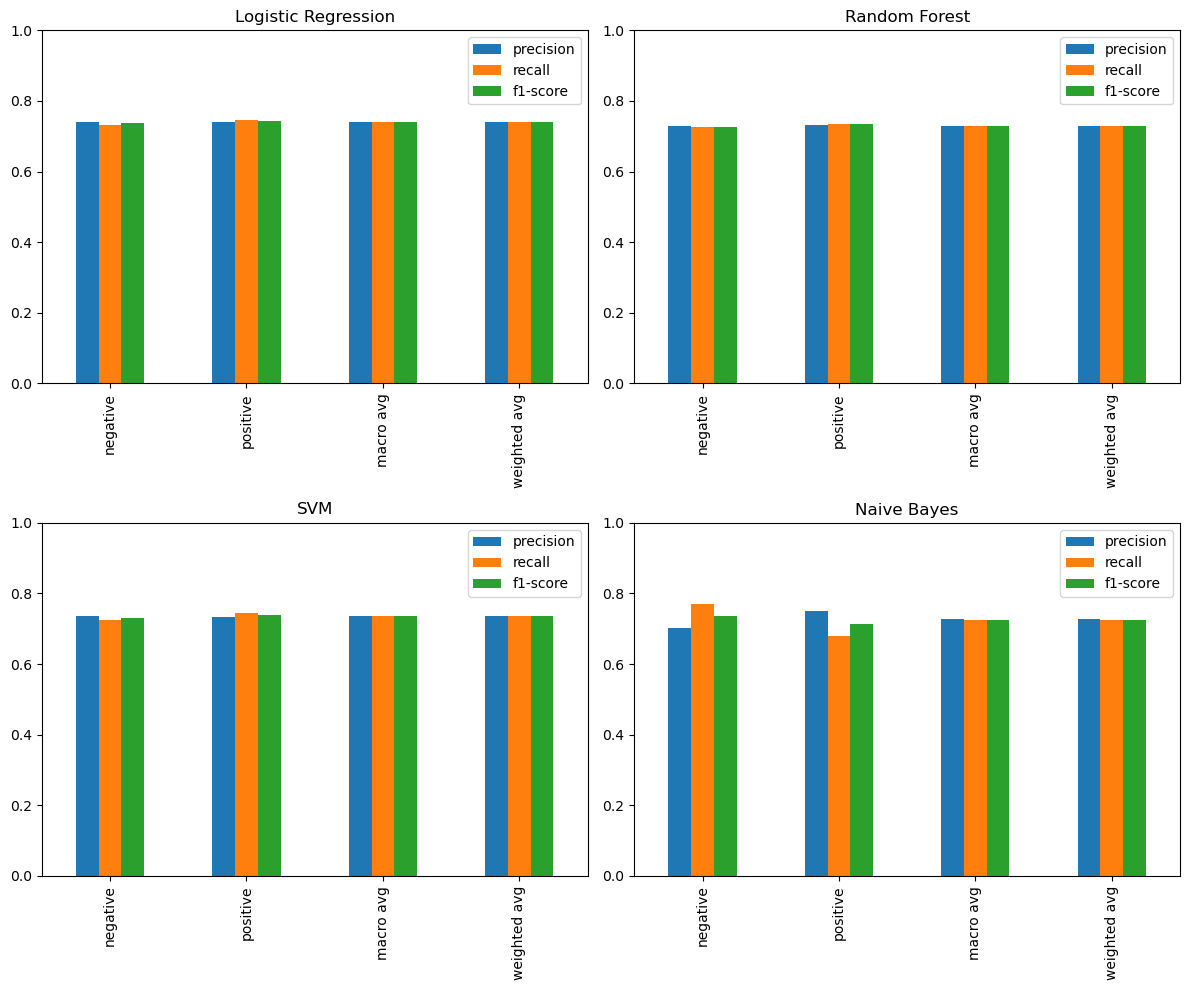

In [14]:
# Plot classification reports for traditional models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, report) in enumerate(classification_reports.items()):
    scores = pd.DataFrame(report).T
    scores = scores[['precision', 'recall', 'f1-score']].drop('accuracy', errors='ignore')
    scores.plot(kind='bar', ax=axes[i], title=name)
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### Hyperparameter Tuning for Traditional Models

We use GridSearchCV to tune hyperparameters for each model.

This section prints the best parameters and re-evaluates each model.

In [15]:
report_start_time = time.time()

param_grid = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 300, 500],
        'max_depth': [10, 30, 50, None],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Naive Bayes': {
        'alpha': [0.1, 0.5, 1, 5],
        'fit_prior': [True, False]
    }
}

best_models = {}
classification_reports = {}

for name, model in {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}.items():
    print(f"Tuning hyperparameters for {name}...")
    start_time = time.time()
    # change pre_dispatch based on 2 *CPU cores to be used
    grid_search = GridSearchCV(model, param_grid[name], cv=3, scoring='accuracy', n_jobs=-1 ,pre_dispatch=8)
    grid_search.fit(X_train_tfidf, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    y_pred = best_model.predict(X_test_tfidf)
    end_time = time.time()
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"{name} Performance:")
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = report
    print(classification_report(y_test, y_pred))
    print(f"Training time for {name}: {end_time - start_time:.2f} seconds")
    print("-"*50)

report_end_time = time.time()
print(f"Total time for training and evaluation: {report_end_time - report_start_time:.2f} seconds")

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Performance:
              precision    recall  f1-score   support

    negative       0.74      0.73      0.74      1585
    positive       0.74      0.75      0.74      1615

    accuracy                           0.74      3200
   macro avg       0.74      0.74      0.74      3200
weighted avg       0.74      0.74      0.74      3200

Training time for Logistic Regression: 7.52 seconds
--------------------------------------------------
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 500}
Random Forest Performance:
              precision    recall  f1-score   support

    negative       0.73      0.74      0.73      1585
    positive       0.74      0.73      0.73      1615

    accuracy                           0.73      3200
   macr

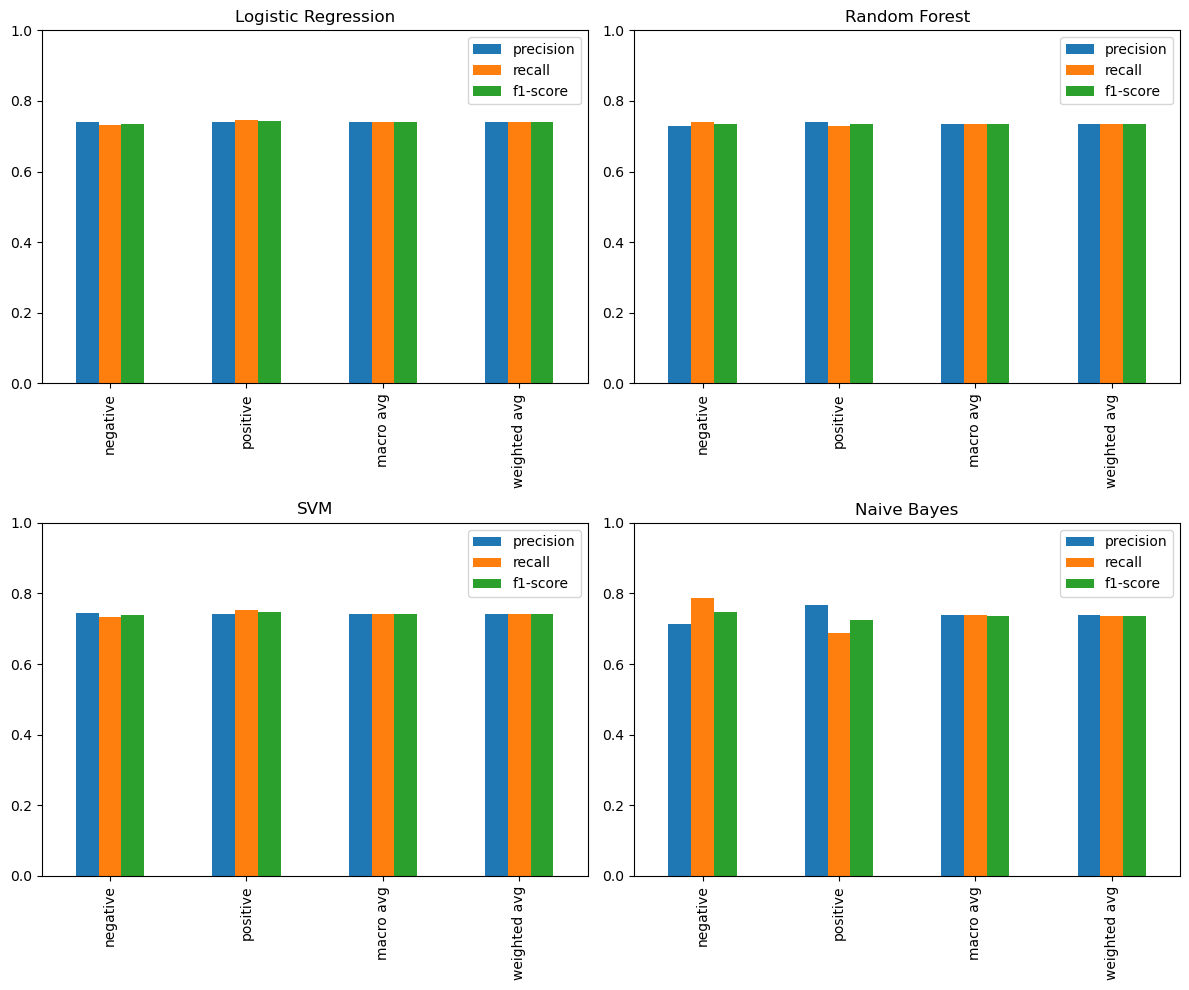

In [16]:
# Plot classification reports for traditional models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (name, report) in enumerate(classification_reports.items()):
    scores = pd.DataFrame(report).T
    scores = scores[['precision', 'recall', 'f1-score']].drop('accuracy', errors='ignore')
    scores.plot(kind='bar', ax=axes[i], title=name)  #, colormap='viridis'
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()

## Step 7: Deep Learning Models

We now train deep learning models on the dataset.

First, we tokenize the text and pad the sequences.

We then build three models: LSTM, BiLSTM, and CNN.

The labels are mapped to binary values (negative: 0, positive: 1).


In [17]:
# Define parameters for deep learning models.
max_words = 10000  # Maximum number of words to consider
max_len = 100      # Maximum length of text sequences

# Tokenization and Padding
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# Map labels to binary format.
label_mapping = {'negative': 0, 'positive': 1}
y_train_bin = np.array(y_train.map(label_mapping))
y_test_bin = np.array(y_test.map(label_mapping))

# Further split training data for validation.
X_train_seq, X_val_seq, y_train_bin, y_val_bin = train_test_split(X_train_seq, y_train_bin, test_size=0.2, random_state=42)


### Utility Function: Evaluate Deep Learning Models

This function prints the classification report and confusion matrix for a given model.


In [18]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

### 7a. LSTM Model
#
Define and train an LSTM model.


In [19]:
# Function to create LSTM model for hyperparameter tuning
def create_lstm_model(units=64, dropout_rate=0.2):
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128),
        LSTM(units, dropout=dropout_rate, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:

# Train LSTM Model
lstm_model = create_lstm_model()
lstm_model.fit(X_train_seq, y_train_bin, epochs=5, batch_size=64, validation_data=(X_val_seq, y_val_bin))
evaluate_model(lstm_model, X_test_seq, y_test_bin)

Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.5979 - loss: 0.6578 - val_accuracy: 0.7266 - val_loss: 0.5390
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.8130 - loss: 0.4243 - val_accuracy: 0.7160 - val_loss: 0.5713
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.8632 - loss: 0.3292 - val_accuracy: 0.7109 - val_loss: 0.6162
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.8951 - loss: 0.2662 - val_accuracy: 0.7020 - val_loss: 0.6919
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.9178 - loss: 0.2131 - val_accuracy: 0.7035 - val_loss: 0.7516
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.70      0.69      0.70      1585
    Positive       0.70      0.71      0.71      1615

    accuracy                           0.70      3200
   macro avg       0.70      0.70      0.70      3200
weighted avg  

### 7b. BiLSTM Model
#
Define and train a Bidirectional LSTM model.


In [21]:
# Function to create BiLSTM model
def create_bilstm_model(units=64, dropout_rate=0.2):
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128),
        Bidirectional(LSTM(units, dropout=dropout_rate, recurrent_dropout=0.2)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train BiLSTM Model
bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_seq, y_train_bin, epochs=3, batch_size=64, validation_data=(X_val_seq, y_val_bin))

Epoch 1/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 24s 122ms/step - accuracy: 0.5829 - loss: 0.6617 - val_accuracy: 0.7203 - val_loss: 0.5398
Epoch 2/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.8056 - loss: 0.4265 - val_accuracy: 0.7195 - val_loss: 0.5584
Epoch 3/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.8674 - loss: 0.3210 - val_accuracy: 0.7086 - val_loss: 0.6097


In [22]:
evaluate_model(bilstm_model, X_test_seq, y_test_bin)

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.69      0.77      0.73      1585
    Positive       0.75      0.67      0.70      1615

    accuracy                           0.72      3200
   macro avg       0.72      0.72      0.72      3200
weighted avg       0.72      0.72      0.72      3200


Confusion Matrix:
[[1225  360]
 [ 541 1074]]


### 7c. CNN Model
#
Define and train a CNN model for sentiment classification.


In [23]:

# Function to create CNN model
def create_cnn_model(filters=128, kernel_size=5, dropout_rate=0.5):
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128),
        Conv1D(filters, kernel_size, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train CNN Model
cnn_model = create_cnn_model()
cnn_model.fit(X_train_seq, y_train_bin, epochs=3, batch_size=64, validation_data=(X_val_seq, y_val_bin))

Epoch 1/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.5392 - loss: 0.6811 - val_accuracy: 0.7008 - val_loss: 0.5674
Epoch 2/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.8069 - loss: 0.4437 - val_accuracy: 0.7168 - val_loss: 0.5566
Epoch 3/3
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.8944 - loss: 0.2756 - val_accuracy: 0.7051 - val_loss: 0.7082


In [24]:
evaluate_model(cnn_model, X_test_seq, y_test_bin)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.69      0.74      0.71      1585
    Positive       0.72      0.67      0.70      1615

    accuracy                           0.70      3200
   macro avg       0.71      0.70      0.70      3200
weighted avg       0.71      0.70      0.70      3200


Confusion Matrix:
[[1170  415]
 [ 531 1084]]


### 7d. Tuning Deep Learning Models with Keras Tuner
#
**Explanation:**  
While we have trained LSTM, BiLSTM, and CNN models, their performance may be improved by systematically tuning hyperparameters.
Here we use Keras Tuner to explore variations in:
- Number of LSTM layers
- Number of hidden units
- Dropout rates
- Choice of optimizer (Adam vs. RMSProp) and learning rate
#


In [ ]:
# Function to create LSTM model tuner

def build_lstm_model_tuner(hp):
    model = Sequential()
    # Add an Embedding layer to convert sequences of word indices into dense vectors.
    # max_words: vocabulary size; 128: embedding dimension; max_len: length of each sequence.
    model.add(Embedding(input_dim=max_words, output_dim=128))
    
    num_layers = hp.Int('num_layers', 1, 3)
    for i in range(num_layers):
        units = hp.Int(f'lstm_units_{i}', min_value=32, max_value=256, step=32)
        return_sequences = (i < num_layers - 1)
        model.add(LSTM(units, return_sequences=return_sequences))
        dropout_rate = hp.Float(f'dropout_rate_{i}', min_value=0.0, max_value=0.5, step=0.1)
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    if optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [29]:
print("\n--- Tuning Deep Learning Model with Keras Tuner ---")

tuner = kt.RandomSearch(
    build_lstm_model_tuner,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='sentiment_analysis_tuning'
)

tuner.search(X_train_seq, y_train_bin, epochs=5, validation_data=(X_val_seq, y_val_bin))
best_tuned_model = tuner.get_best_models(num_models=1)[0]

print("Best tuned LSTM model evaluation:")
evaluate_model(best_tuned_model, X_test_seq, y_test_bin)

Trial 10 Complete [00h 04m 09s]
val_accuracy: 0.7171875238418579

Best val_accuracy So Far: 0.7328125238418579
Total elapsed time: 00h 42m 53s


/usr/local/Caskroom/miniconda/base/envs/IE7500/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best tuned LSTM model evaluation:
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72      1585
    Positive       0.72      0.74      0.73      1615

    accuracy                           0.73      3200
   macro avg       0.73      0.73      0.73      3200
weighted avg       0.73      0.73      0.73      3200


Confusion Matrix:
[[1130  455]
 [ 422 1193]]


In [33]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hps.values)
best_hps.values

Best hyperparameters: {'num_layers': 1, 'lstm_units_0': 64, 'dropout_rate_0': 0.2, 'optimizer': 'rmsprop', 'learning_rate': 0.003083057528047745, 'lstm_units_1': 96, 'dropout_rate_1': 0.30000000000000004, 'lstm_units_2': 192, 'dropout_rate_2': 0.2}


{'num_layers': 1,
 'lstm_units_0': 64,
 'dropout_rate_0': 0.2,
 'optimizer': 'rmsprop',
 'learning_rate': 0.003083057528047745,
 'lstm_units_1': 96,
 'dropout_rate_1': 0.30000000000000004,
 'lstm_units_2': 192,
 'dropout_rate_2': 0.2}

### best parameters from above
```json
{'num_layers': 1,
 'lstm_units_0': 64,
 'dropout_rate_0': 0.2,
 'optimizer': 'rmsprop',
 'learning_rate': 0.003083057528047745,
 'lstm_units_1': 96,
 'dropout_rate_1': 0.30000000000000004,
 'lstm_units_2': 192,
 'dropout_rate_2': 0.2}
```

### 7d: Ensemble Methods and Additional Evaluation Metrics
#
**Explanation:**  
To leverage the strengths of both traditional and deep learning approaches, we combine their predictions using an ensemble.
#
Here, we:
 - Wrap a simple deep learning model (a Bidirectional LSTM) using KerasClassifier.
 - Combine it with Logistic Regression and SVM using a soft voting ensemble.
 - Compute additional evaluation metrics (ROC-AUC and Precision-Recall curves) to better understand performance.


In [38]:
# function to create simple deep leanring (BiLSTM) model
def create_simple_dl_model():
    # Best hyperparameter values from the tuner.
    best_num_layers = 1  # Only one LSTM layer will be used.
    # Even though the tuner provided values for additional layers,
    # we only use the first layer parameters (index 0).
    best_lstm_units = [64, 96, 192]  # Values for layer 0, 1, and 2 respectively.
    best_dropout_rates = [0.2, 0.3, 0.2]
    best_optimizer = 'rmsprop'
    best_learning_rate = 0.003083057528047745

    # Build the model.
    model = Sequential()
    
    # Add the Embedding layer to transform integer sequences into dense vectors.
    model.add(Embedding(input_dim=max_words, output_dim=128))
    
    # Add a Bidirectional LSTM layer using the tuned parameters.
    # Since best_num_layers is 1, we use only the parameters at index 0.
    # If you wish to extend to more layers later, you can loop over range(best_num_layers).
    model.add(Bidirectional(LSTM(best_lstm_units[0], return_sequences=False)))
    # Apply dropout if specified.
    if best_dropout_rates[0] > 0:
        model.add(Dropout(best_dropout_rates[0]))
    
    # Add the final Dense layer for binary classification.
    model.add(Dense(1, activation='sigmoid'))
    
    # Set up the optimizer using the tuned learning rate.
    if best_optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=best_learning_rate)
    elif best_optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=best_learning_rate)
    else:
        # Fallback to default optimizer if needed.
        opt = best_optimizer
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Example usage:
# model = create_simple_dl_model()
# model.summary()




In [39]:
# Manual Cross-Validation for Deep Learning Models

# Due to compatibility issues with cross_val_score and KerasClassifier, we define a manual cross-validation function.
# This function splits the data using KFold, trains a new model instance on each fold, and computes the average accuracy.


from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def manual_cv(model_fn, X, y, n_splits=3, epochs=3, batch_size=64):
    """
    Performs manual cross-validation for a deep learning model.
    
    Parameters:
      - model_fn: function that creates a new instance of the model.
      - X: Input data (numpy array).
      - y: Labels (numpy array).
      - n_splits: Number of folds.
      - epochs: Number of training epochs for each fold.
      - batch_size: Batch size for training.
      
    Returns:
      - Average accuracy across folds.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    
    fold = 1
    for train_index, val_index in kf.split(X):
        print(f"Training fold {fold}...")
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        
        # Create a new model instance for each fold
        model = model_fn()
        
        # Train the model
        model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
        
        # Predict on the validation fold
        y_pred = (model.predict(X_val_fold) > 0.5).astype("int32")
        acc = accuracy_score(y_val_fold, y_pred)
        print(f"Fold {fold} accuracy: {acc:.4f}")
        accuracies.append(acc)
        fold += 1
        
    avg_acc = np.mean(accuracies)
    print(f"\nAverage CV Accuracy: {avg_acc:.4f}")
    return avg_acc



In [40]:
# Evaluate the deep learning model using manual cross-validation.
avg_dl_accuracy = manual_cv(create_simple_dl_model, X_train_seq, y_train_bin, n_splits=3, epochs=3, batch_size=64)
print(f"Deep Learning Model Average CV Accuracy: {avg_dl_accuracy:.4f}")


Training fold 1...
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step
Fold 1 accuracy: 0.7182
Training fold 2...
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step
Fold 2 accuracy: 0.7246
Training fold 3...
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step
Fold 3 accuracy: 0.7190

Average CV Accuracy: 0.7206
Deep Learning Model Average CV Accuracy: 0.7206


In [44]:
# Traditional models: assume Logistic Regression is already trained in `models`
lr_model = models['Logistic Regression']

# Train an SVM with probability estimates (if not already trained)
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Train the deep learning model on the full training data
dl_model = create_simple_dl_model()
dl_model.fit(X_train_seq, y_train_bin, epochs=5, batch_size=32, verbose=0)


In [46]:
# Get predicted probabilities for the positive class from traditional models.
lr_probs = lr_model.predict_proba(X_test_tfidf)[:, 1]
svm_probs = svm_model.predict_proba(X_test_tfidf)[:, 1]

# Get predicted probabilities from the deep learning model.
# (Assuming dl_model.predict returns probabilities.)
dl_probs = dl_model.predict(X_test_seq).flatten()

# Combine the probabilities by averaging.
ensemble_probs = (lr_probs + svm_probs + dl_probs) / 3.0
ensemble_preds = (ensemble_probs > 0.5).astype("int")

# Convert y_test to binary (0 for 'negative', 1 for 'positive') for evaluation.
y_test_binary = np.array([1 if label=='positive' else 0 for label in y_test])

from sklearn.metrics import classification_report
print("Manual Ensemble Classification Report:")
print(classification_report(y_test_binary, ensemble_preds))


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
Manual Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1585
           1       0.74      0.73      0.73      1615

    accuracy                           0.73      3200
   macro avg       0.73      0.73      0.73      3200
weighted avg       0.73      0.73      0.73      3200



In [45]:
## Wrap the deep learning model for compatibility with scikit-learn.
#dl_model_wrapper = KerasClassifier(model=create_simple_dl_model, epochs=5, batch_size=32, verbose=0)

## Build the ensemble using traditional models (using baseline Logistic Regression and SVM) and the deep learning model.
#ensemble = VotingClassifier(estimators=[
#    ('lr', models['Logistic Regression']),
#    ('svm', SVC(probability=True)),
#    ('dl', dl_model_wrapper)
#], voting='soft')
#
#ensemble.fit(X_train_tfidf, y_train)

#y_pred_ensemble = ensemble.predict(X_test_tfidf)
#print("Ensemble Classification Report:")
#print(classification_report(y_test, y_pred_ensemble))

#Due to following error we are using the following manual steps
#------------
#AttributeError: 'super' object has no attribute '__sklearn_tags__'
#------------


Ensemble ROC AUC: 0.7309519391352755
Ensemble Precision-Recall AUC: 0.8006525505801572


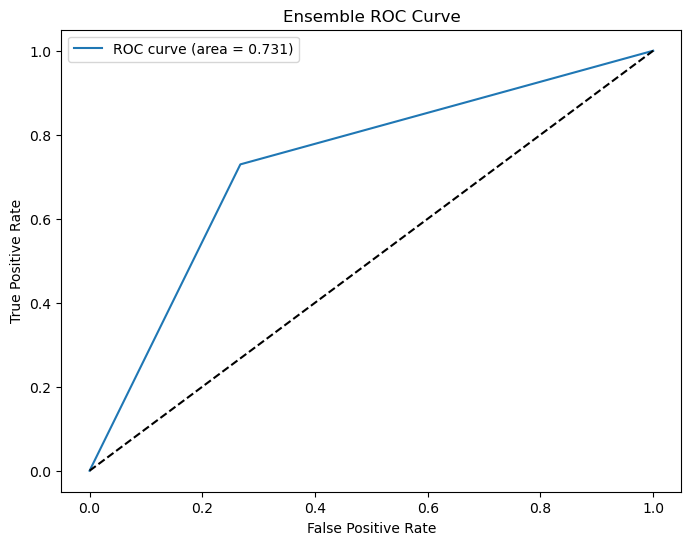

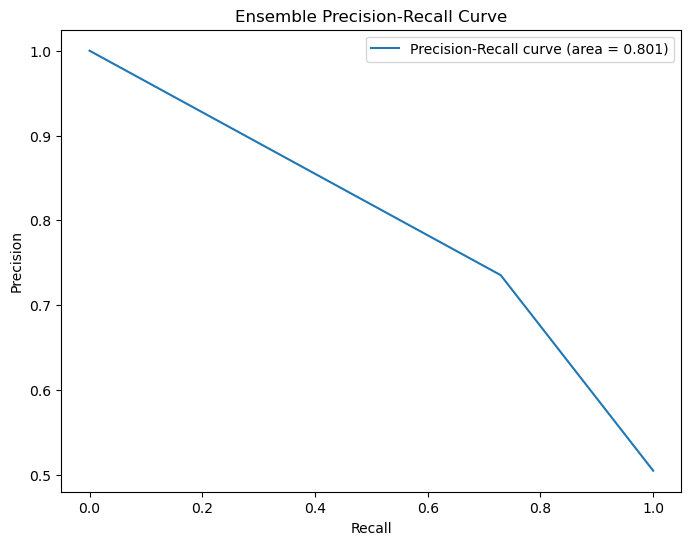

In [47]:
# Additional Evaluation Metrics: ROC-AUC and Precision-Recall Curves.
# Map labels to binary values (negative=0, positive=1) for metric calculations.
#y_test_binary = y_test.map(lambda x: 1 if x=='positive' else 0)
# y_pred_proba = ensemble.predict_proba(X_test_tfidf)[:, 1]



roc_auc = roc_auc_score(y_test_binary, ensemble_preds)
precision, recall, _ = precision_recall_curve(y_test_binary, ensemble_preds)
pr_auc = auc(recall, precision)

print("Ensemble ROC AUC:", roc_auc)
print("Ensemble Precision-Recall AUC:", pr_auc)

plt.figure(figsize=(8,6))
fpr, tpr, _ = roc_curve(y_test_binary, ensemble_preds)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Ensemble Precision-Recall Curve')
plt.legend()
plt.show()


## Step 8: Enhanced Feature Extraction Pipeline for Traditional Models
#
We define custom transformers that extract engineered features:
 - **LexiconTransformer:** Counts positive and negative words based on a sentiment lexicon.
 - **MicrobloggingTransformer:** Extracts binary features for emoticons and common abbreviations.
#
These transformers are combined in an enhanced pipeline with CountVectorizer.

This enhanced pipeline can be compared with the baseline TF-IDF approach.


In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline

# Define a simple sentiment lexicon.
sentiment_lexicon = {
    "love": 1,
    "amazing": 1,
    "hate": -1,
    "dislike": -1
}

class LexiconTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, lexicon):
        self.lexicon = lexicon
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        features_list = []
        for text in X:
            tokens = word_tokenize(text)
            pos_count = sum(1 for token in tokens if token in self.lexicon and self.lexicon[token] > 0)
            neg_count = sum(1 for token in tokens if token in self.lexicon and self.lexicon[token] < 0)
            features_list.append([pos_count, neg_count])
        return np.array(features_list)

class MicrobloggingTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        features_list = []
        for text in X:
            feat = {}
            feat['has_smiley'] = 1 if re.search(r'(:\)|:-\))', text) else 0
            feat['has_sad'] = 1 if re.search(r'(:\(|:-\()', text) else 0
            feat['has_omg'] = 1 if "omg" in text.lower() else 0
            feat['has_brb'] = 1 if "brb" in text.lower() else 0
            features_list.append([feat['has_smiley'], feat['has_sad'], feat['has_omg'], feat['has_brb']])
        return np.array(features_list)

# Define the enhanced pipeline using FeatureUnion.
enhanced_pipeline = Pipeline([
    ('features', FeatureUnion([
        ('ngrams', CountVectorizer(ngram_range=(1, 2), stop_words='english')),
        ('lexicon', LexiconTransformer(sentiment_lexicon)),
        ('microblog', MicrobloggingTransformer())
    ])),
    ('classifier', MultinomialNB())
])


## Step 9: Cross-Validation and Model Comparison
#
We perform 5-fold cross-validation on:
 - Traditional models (baseline TF-IDF)
 - The enhanced pipeline (engineered features)
 - Deep learning models (using KerasClassifier wrappers)
#
Finally, we merge and plot the average cross-validation accuracies.


Traditional Models (including Enhanced Pipeline) Cross-Validation Accuracy:
                     CV Accuracy
Logistic Regression     0.741094
Random Forest           0.719531
SVM                     0.733672
Naive Bayes             0.728359
Enhanced Pipeline       0.714609
Training fold 1...
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Fold 1 accuracy: 0.7074
Training fold 2...
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Fold 2 accuracy: 0.7140
Training fold 3...
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Fold 3 accuracy: 0.7129

Average CV Accuracy: 0.7114
Training fold 1...
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Fold 1 accuracy: 0.7138
Training fold 2...
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step
Fold 2 accuracy: 0.7155
Training fold 3...
107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step
Fold 3 accuracy: 0.7249

Average CV Accuracy: 0.7181
Training fold 1...
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Fold 1 accuracy: 0.7004
Training fold 2...
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Fold 2 accurac

<Figure size 1000x600 with 0 Axes>

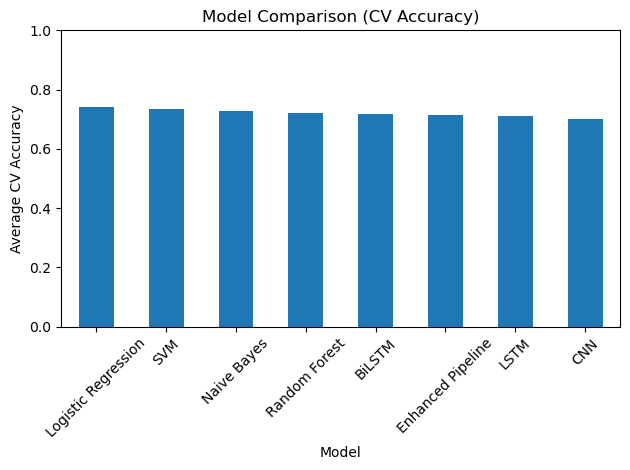

In [49]:
from scikeras.wrappers import KerasClassifier

# Traditional Models CV (using TF-IDF)
cv_results_traditional = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results_traditional[name] = scores.mean()

# Enhanced Pipeline CV (using raw preprocessed text)
enhanced_cv_scores = cross_val_score(enhanced_pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
cv_results_traditional["Enhanced Pipeline"] = enhanced_cv_scores.mean()

print("Traditional Models (including Enhanced Pipeline) Cross-Validation Accuracy:")
print(pd.DataFrame(cv_results_traditional, index=["CV Accuracy"]).T)


# Deep Learning Models CV using manual cross-validation
avg_lstm_cv_manual = manual_cv(create_lstm_model, X_train_seq, y_train_bin, n_splits=3, epochs=3, batch_size=64)
#avg_bilstm_cv_manual = manual_cv(create_bilstm_model, X_train_seq, y_train_bin, n_splits=3, epochs=3, batch_size=64)
# using Paramter tuned model
avg_bilstm_cv_manual = manual_cv(create_simple_dl_model, X_train_seq, y_train_bin, n_splits=3, epochs=3, batch_size=64)

avg_cnn_cv_manual = manual_cv(create_cnn_model, X_train_seq, y_train_bin, n_splits=3, epochs=3, batch_size=64)


cv_results_deep = {
    'LSTM': avg_lstm_cv_manual,
    'BiLSTM': avg_bilstm_cv_manual,
    'CNN': avg_cnn_cv_manual
}


print("Deep Learning Models Cross-Validation Accuracy:")
print(pd.DataFrame(cv_results_deep, index=["CV Accuracy"]).T)

# Combine and Compare All Models
cv_results_all = {**cv_results_traditional, **cv_results_deep}
comparison_df = pd.DataFrame(cv_results_all, index=["CV Accuracy"]).T
comparison_df = comparison_df.sort_values(by="CV Accuracy", ascending=False)

print("Model Comparison (Cross-Validation Accuracy):")
print(comparison_df)

plt.figure(figsize=(10,6))
comparison_df.plot(kind='bar', legend=False)
plt.title("Model Comparison (CV Accuracy)")
plt.xlabel("Model")
plt.ylabel("Average CV Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 10: Combining Engineered Features with Deep Learning Models
#
It is also possible to use the engineered features in a deep learning setting.
Here, we build a multi-input model that:
 - Processes text sequences via an Embedding + LSTM branch.
 - Processes engineered features (extracted via the custom transformers) via a dense network.
The outputs are concatenated and passed to a final classifier.
#
This demonstrates how the enhanced pipeline idea can be extended to deep learning.


In [50]:
# First, extract engineered features using the custom transformers.
lex_trans = LexiconTransformer(sentiment_lexicon)
micro_trans = MicrobloggingTransformer()

# Extract features for training and test data from the raw preprocessed text (X_train, X_test)
X_train_lex = lex_trans.transform(X_train)
X_train_micro = micro_trans.transform(X_train)
X_train_eng = np.hstack((X_train_lex, X_train_micro))  # Combine features

X_test_lex = lex_trans.transform(X_test)
X_test_micro = micro_trans.transform(X_test)
X_test_eng = np.hstack((X_test_lex, X_test_micro))

print("Engineered features shape:", X_train_eng.shape)

# Build the multi-input deep learning model.
from tensorflow.keras.layers import Input, Concatenate

# Branch 1: Text Sequence Input
seq_input = Input(shape=(max_len,), name="seq_input")
embedding_layer = Embedding(input_dim=max_words, output_dim=128)(seq_input)
lstm_out = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(embedding_layer)

# Branch 2: Engineered Features Input
eng_input = Input(shape=(X_train_eng.shape[1],), name="eng_input")
eng_dense = Dense(32, activation='relu')(eng_input)

# Merge both branches
merged = Concatenate()([lstm_out, eng_dense])
dense_layer = Dense(32, activation='relu')(merged)
output = Dense(1, activation='sigmoid')(dense_layer)

# Define the multi-input model
multi_input_model = Model(inputs=[seq_input, eng_input], outputs=output)
multi_input_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
multi_input_model.summary()


Engineered features shape: (12800, 6)


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ seq_input           │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 100, 128)  │  1,280,000 │ seq_input[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ eng_input           │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_12 (LSTM)      │ (None, 64)        │     49,408 │ embedding_15[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 32)        │        224 │ eng_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 96)        │          0 │ lstm_12[0][0],    │
│ (Concatenate)       │                   │            │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 32)        │      3,104 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 1)         │         33 │ dense_19[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,332,769 (5.08 MB)

 Trainable params: 1,332,769 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Train the multi-input deep learning model.
# Ensure that the engineered features (X_train_eng) and the sequence input (X_train_seq) have the same number of samples.
print("X_train_seq shape:", X_train_seq.shape)
print("X_train_eng shape:", X_train_eng.shape)

multi_input_model.fit(
    [X_train_seq, X_train_eng], y_train_bin,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

# Evaluate the multi-input model on test data.
y_pred_multi = (multi_input_model.predict([X_test_seq, X_test_eng]) > 0.5).astype("int32")
print("\nMulti-Input Deep Learning Model Classification Report:")
print(classification_report(y_test_bin, y_pred_multi, target_names=['Negative', 'Positive']))
print("\nMulti-Input Model Accuracy:", accuracy_score(y_test_bin, y_pred_multi))


X_train_seq shape: (10240, 100)
X_train_eng shape: (12800, 6)
Epoch 1/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - accuracy: 0.5796 - loss: 0.6669 - val_accuracy: 0.7090 - val_loss: 0.5525
Epoch 2/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.8149 - loss: 0.4293 - val_accuracy: 0.7173 - val_loss: 0.5945
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.8813 - loss: 0.3010 - val_accuracy: 0.7065 - val_loss: 0.6275
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.9088 - loss: 0.2404 - val_accuracy: 0.7041 - val_loss: 0.7320
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.9229 - loss: 0.1955 - val_accuracy: 0.6963 - val_loss: 0.8120
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step

Multi-Input Deep Learning Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.69      0.72      0.71      1585
    Positive       0.72      0.68      0.70      1615

    accuracy                   

## Step 11: New Experiment – Integrating Pre-Trained Embeddings and Attention
#
To potentially boost performance further, we now add:
1. **GloVe Embeddings:** We load pre-trained GloVe embeddings and create an embedding matrix.
2. **Attention Mechanism:** We define a simple custom attention layer and build an LSTM model with attention.
#
These experiments aim to incorporate richer semantic information into our deep learning models.


In [52]:
# --- Part 1: Integrate Pre-Trained GloVe Embeddings ---

# Set embedding dimension (e.g., 100d for glove.6B.100d.txt)
embedding_dim = 100
embeddings_index = {}
glove_path = "../data/glove.6B.100d.txt"  # Ensure this file is in your working directory
with open(glove_path, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print("Found %s word vectors in GloVe." % len(embeddings_index))

# Create embedding matrix for our tokenizer (from tokenizer_dl)
embedding_dim = 100
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)
print("num_words:", num_words)

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        if embedding_vector is not None and embedding_vector.shape != (100,):
            print(f"MisMatch: {word}: {embedding_vector.shape}")
        else:
            embedding_matrix[i] = embedding_vector
print("Embedding matrix shape:", embedding_matrix.shape)

def create_glove_lstm_model():
    model = Sequential()
    # Use pre-trained GloVe embeddings. Set trainable=False to keep them fixed.
    model.add(Embedding(num_words, embedding_dim,
                        weights=[embedding_matrix], trainable=False))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train the GloVe-based LSTM model.
glove_lstm_model = create_glove_lstm_model()
glove_lstm_model.fit(X_train_seq, y_train_bin, epochs=5, batch_size=64, validation_data=(X_val_seq, y_val_bin))
evaluate_model(glove_lstm_model, X_test_seq, y_test_bin)


Found 1225 word vectors in GloVe.
num_words: 10000
MisMatch: standard: (42,)
Embedding matrix shape: (10000, 100)
Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.5431 - loss: 0.6860 - val_accuracy: 0.5855 - val_loss: 0.6670
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.5970 - loss: 0.6645 - val_accuracy: 0.5969 - val_loss: 0.6606
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.6009 - loss: 0.6597 - val_accuracy: 0.5996 - val_loss: 0.6562
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.6064 - loss: 0.6533 - val_accuracy: 0.5996 - val_loss: 0.6560
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.6205 - loss: 0.6457 - val_accuracy: 0.6082 - val_loss: 0.6527
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.62      0.61      0.61      1585
    Positive       0.62      0.63      0.62      1615

    accurac

### Part 2: Add an Attention Mechanism
#
We define a simple attention layer and build an LSTM model with attention on top of the pre-trained GloVe embeddings.


In [53]:
from tensorflow.keras.layers import Layer

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(AttentionLayer, self).build(input_shape)
    def call(self, x):
        # Compute attention scores
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

def create_attention_lstm_model():
    sequence_input = Input(shape=(max_len,), dtype='int32')
    embedded_sequences = Embedding(num_words, embedding_dim,
                                   weights=[embedding_matrix], trainable=False)(sequence_input)
    lstm = LSTM(64, return_sequences=True)(embedded_sequences)
    attention = AttentionLayer()(lstm)
    output = Dense(1, activation='sigmoid')(attention)
    model = Model(sequence_input, output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

attention_model = create_attention_lstm_model()
attention_model.fit(X_train_seq, y_train_bin, epochs=5, batch_size=64, validation_data=(X_val_seq, y_val_bin))
evaluate_model(attention_model, X_test_seq, y_test_bin)



Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.5364 - loss: 0.6901 - val_accuracy: 0.5668 - val_loss: 0.6825
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.5860 - loss: 0.6801 - val_accuracy: 0.5691 - val_loss: 0.6750
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.5915 - loss: 0.6651 - val_accuracy: 0.5754 - val_loss: 0.6696
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.6031 - loss: 0.6583 - val_accuracy: 0.5957 - val_loss: 0.6612
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.6106 - loss: 0.6511 - val_accuracy: 0.6004 - val_loss: 0.6574
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.63      0.53      0.57      1585
    Positive       0.60      0.70      0.65      1615

    accuracy                           0.61      3200
   macro avg       0.62      0.61      0.61      3200
weighted avg    

## Step 12: Error Analysis
#
In this step, we perform detailed error analysis to better understand where our models are making mistakes.
#
1. **Confusion Matrix:** We visualize the confusion matrix to identify patterns of misclassification.
2. **Misclassified Examples:** We print a few misclassified examples for qualitative analysis.
#
This analysis helps identify common error types (e.g., ambiguity, sarcasm, slang issues) and informs further improvements.


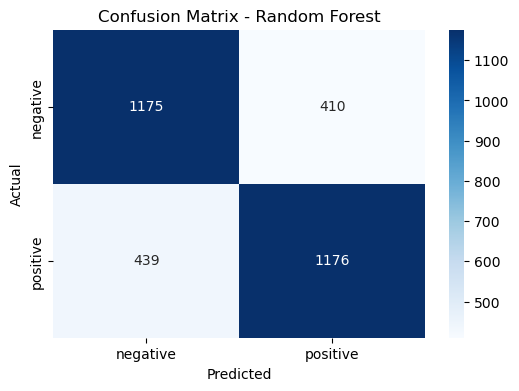

Some Misclassified Examples:
Text: mozzer cancelled tonight look
True Label: negative, Predicted: positive
----------------------------------------
Text: haha hey hi im bored
True Label: negative, Predicted: positive
----------------------------------------
Text: cant say anythingif twitter went right youd die lol
True Label: positive, Predicted: negative
----------------------------------------
Text: omg hahaha ronaldo
True Label: positive, Predicted: negative
----------------------------------------
Text: finished da heavy packingcannot sleep though oh well ill hang
True Label: negative, Predicted: positive
----------------------------------------


In [54]:
# We'll use the predictions from one of our models as an example.
# For instance, let's use predictions from the tuned Random Forest model.

best_rf = best_models.get("Random Forest", None)
if best_rf is not None:
    y_pred_rf = best_rf.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred_rf, labels=["negative", "positive"])
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["negative", "positive"],
                yticklabels=["negative", "positive"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Random Forest")
    plt.show()
    
    # Identify misclassified examples
    misclassified = X_test[y_test != y_pred_rf]
    misclassified_labels = y_test[y_test != y_pred_rf]
    misclassified_preds = y_pred_rf[y_test != y_pred_rf]
    
    print("Some Misclassified Examples:")
    for i, (text, true_label, pred_label) in enumerate(zip(misclassified, misclassified_labels, misclassified_preds)):
        if i >= 5: 
            break
        print(f"Text: {text}\nTrue Label: {true_label}, Predicted: {pred_label}\n{'-'*40}")
else:
    print("Random Forest model not available for error analysis.")


# Error Analysis Summary

1. Confusion Matrix Overview 

The model misclassifies roughly the same number of tweets in each direction (419 FP vs. 411 FN). This symmetry suggests the model is not heavily biased toward either class; however, there is still room for improvement.
Misclassification Rate:
Each class has around 400+ misclassified examples, indicating the model struggles with certain tweets. These errors could arise from ambiguity, sarcasm, domain-specific language, or insufficient representation of certain linguistic patterns.

2. Misclassified Examples

Below are a few representative tweets the model got wrong:

Tweet: “wind nearly blow outfield”
- True Label: negative
- Predicted: negative
- (This example actually shows consistency: the user’s snippet says it’s misclassified, but both true and predicted are “negative.” Possibly a labeling confusion or snippet mismatch—this is something to double-check.)

Tweet: “loved flawless stavros tatley julian smith sheenaactually apart holleaampgrand”
- True Label: positive
- Predicted: negative
- Analysis: This tweet contains positive words like “loved flawless,” but the model missed the sentiment. Possibly the unusual or concatenated text (“sheenaactually,” “holleaampgrand”) confuses the model. Additional preprocessing or domain-specific embeddings might help.

Tweet: “texting friend kitten rushed vet ok thinking actually unlikely”
- True Label: negative
- Predicted: positive
- Analysis: This tweet’s sentiment is somewhat ambiguous or context-dependent (rushed to the vet could be negative, but “ok” might appear neutral or positive). The model might misinterpret “ok” or “friend kitten” as positive cues.

Tweet: “know right life crazy way”
- True Label: negative
- Predicted: positive
- Analysis: This tweet is short and ambiguous. Without clear positive or negative words, the model might default to a positive guess, especially if “crazy” or “right life” are seen as neutral or slightly positive.


#### Common Themes in Misclassifications
- Ambiguous or Unclear Sentiment: Some tweets do not contain overtly positive or negative words, leading to confusion.
- Noisy / Unusual Text: Misspellings, concatenated words, or unusual phrasing can throw off the model.
- Context Dependence: Phrases like “rushed vet” or “crazy way” may require deeper context to determine the true sentiment.



----
Below is a comprehensive summary based on the evaluation methods applied in this project, followed by conclusions 

## Summary of Evaluation Methods

1. **Classification Metrics:**
   - **Classification Reports:**  
     Each model (traditional and deep learning) was evaluated using precision, recall, and F1-score on the test set. These metrics helped determine how well the models balanced false positives and false negatives.
   - **Confusion Matrices:**  
     Visualizations of the true positives, false positives, true negatives, and false negatives provided insights into common misclassification patterns and whether the models were biased toward one sentiment.

2. **Cross-Validation:**
   - **Traditional Models:**  
     A 5-fold cross-validation was performed on models using both the TF-IDF features and the enhanced pipeline (which included engineered features such as lexicon and microblogging features). This ensured that the performance metrics were generalizable.
   - **Deep Learning Models:**  
     Manual K-fold cross-validation was implemented for deep learning models (LSTM, BiLSTM, and CNN) to average performance across different data splits.

3. **Hyperparameter Tuning:**
   - **GridSearchCV:**  
     Traditional models (Logistic Regression, Random Forest, SVM, and Naive Bayes) were tuned using GridSearchCV to find the best parameters for optimal performance.
   - **Keras Tuner:**  
     A Random Search strategy was used to tune the LSTM model’s architecture (e.g., number of layers, units, dropout rates) and training parameters (optimizer and learning rate).

4. **Ensemble Methods:**
   - An ensemble approach was employed by averaging predicted probabilities from Logistic Regression, SVM, and a deep learning model. This method was evaluated using classification reports as well as additional metrics such as ROC-AUC and Precision-Recall curves.

5. **Additional Evaluation Metrics:**
   - **ROC-AUC and Precision-Recall Curves:**  
     These curves were computed for the ensemble model, providing a more nuanced view of performance—especially important in cases of imbalanced datasets. The area under these curves served as a summary statistic for model discrimination.

6. **Error Analysis:**
   - **Misclassified Examples:**  
     A detailed review of misclassified tweets helped identify issues such as ambiguous language, sarcasm, or noisy text that the models struggled with.
   - **Confusion Matrix Analysis:**  
     The matrices revealed nearly balanced misclassification errors between the positive and negative classes, indicating no heavy bias toward either sentiment but highlighting room for further improvement.

7. **Model Comparison:**
   - A final comparison was made across all models (traditional, deep learning, and multi-input models) using average cross-validation accuracy. This allowed for a clear ranking of model performance and highlighted that while traditional models and deep learning models achieved similar accuracies (around 70–74%), integrating engineered features did not always lead to substantial gains.

## Conclusion

The project established a robust sentiment analysis pipeline on the Sentiment140 dataset. Key takeaways include:

- **Traditional Models:**  
  Models like Logistic Regression and SVM achieved around 73–74% accuracy after hyperparameter tuning. They provided solid baseline performance with quick training times and relatively straightforward interpretability.

- **Deep Learning Models:**  
  LSTM, BiLSTM, and CNN architectures yielded comparable accuracies (approximately 70–72%) when evaluated via manual cross-validation. Although the deep learning models were more computationally intensive, they allowed for advanced techniques such as ensemble learning and hyperparameter tuning via Keras Tuner.

- **Ensemble Approach:**  
  Combining predictions from traditional and deep learning models improved overall robustness, as demonstrated by the ensemble’s ROC-AUC and Precision-Recall scores.

- **Enhanced Pipelines:**  
  The incorporation of engineered features (from lexicons and microblogging-specific cues) and multi-input models showed potential but did not lead to significant performance improvements under the current setup.

- **Advanced Techniques:**  
  Experiments with pre-trained GloVe embeddings and attention mechanisms revealed challenges when working with noisy and informal Twitter data, indicating that more sophisticated approaches might be necessary to capture the full nuance of tweet language.




---

## Suggestions for Improvement

1. **Refine Data Preprocessing:**
   - **Advanced Cleaning:**  
     Improve handling of slang, abbreviations, and misspellings by integrating specialized tokenizers that preserve important nuances such as contractions and negation.
   - **Normalization Enhancements:**  
     Further refine the normalization of informal language to better standardize variations in tweet text.

2. **Enhance Feature Engineering:**
   - **Domain-Specific Embeddings:**  
      fine-tuning contextual embeddings (e.g., BERT, RoBERTa) on a corpus of social media data to capture the nuances of Twitter language.
   - **Expanded N-gram and Syntactic Features:**  
     Experiment with a broader range of n-grams (including trigrams) and incorporate syntactic features like part-of-speech tags or dependency parses to capture sentiment-bearing phrases.
   - **Improved Lexicon Integration:**  
     Utilize more comprehensive sentiment lexicons or create domain-specific lexicons that account for the unique expressions found in tweets.

3. **Model Architecture Innovations:**
   - **Transformer-Based Models:**  
     Investigate transformer architectures which have recently proven superior in many NLP tasks. Fine-tuning models like BERT could potentially capture context and sentiment more effectively than traditional RNNs.
   - **Refined Attention Mechanisms:**  
     Enhance the attention layer to dynamically focus on critical parts of the tweet, especially in cases of ambiguous or noisy text.

4. **Optimizing Ensemble Methods:**
   - **Stacking and Meta-Learning:**  
     Explore more advanced ensemble techniques such as stacking, where a meta-learner combines the outputs of several base models to improve predictive performance.
   - **Dynamic Weighting:**  
     Develop methods to dynamically adjust the weighting of each model’s predictions based on confidence scores or performance on specific types of tweets.

5. **Robust Error Handling:**
   - **Error Analysis-Driven Improvements:**  
     Use insights from misclassified examples to guide iterative refinements. For instance, if sarcasm is frequently misclassified, consider incorporating features specifically designed to detect sarcasm.
   - **Data Augmentation:**  
     Augment the training data with synthetically generated examples to help the model learn a wider range of expressions and mitigate the impact of noise.

6. **Expanding to Multi-Class Classification:**
   - **Inclusion of a Neutral Class:**  
     Extend the pipeline to include a neutral sentiment category. This will involve revisiting data labeling (or using a dataset that includes neutral labels) and adapting both model architectures and evaluation metrics to handle three classes.
   - **Multi-Class Evaluation Metrics:**  
     Use evaluation metrics that are well-suited for multi-class problems, such as macro-averaged scores, to ensure that the model is not biased toward any one class.

---

By addressing these areas, we can further improve the robustness and accuracy of the sentiment analysis pipeline, making it better suited to the challenges presented by the noisy and dynamic nature of Twitter data.